In [1]:
import argparse

import numpy as np
import tensorflow as tf
import keras.backend as K

import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.regularizers import l2

import glob
import os
import cv2
import keras


import time
import argparse

from tqdm import tqdm

from keras.models import load_model, Model


In [2]:
cd C:/Users/fjdur/Documents/utils/

C:\Users\fjdur\Documents\utils


In [3]:
import utils_guided_retraining as utils

2.5.0
keras
2.5.0


In [4]:
dataset = "cifar"

In [5]:
x_test,y_test = utils.get_data(dataset,"Test")

In [6]:
x_train_and_adversary,y_train_and_adversary = utils.get_data(dataset,"Train_and_adversary")

In [7]:
x_test_and_adversary,y_test_and_adversary = utils.get_adversarial_data(dataset,'Test_adversarial') 

In [8]:

model_dir = "C:/Users/fjdur/Documents/upc-july/models/tf_model_25-06/"
if(dataset == 'gtsrb'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/tf_model_25-06"
elif(dataset == 'intel'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/intel_model_21_10"
elif(dataset == 'mnist'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/models2"
elif(dataset == 'cifar'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/model_02"


In [9]:
print(model_dir)
model_original = utils.My_model(dataset,True, model_dir)

C:/Users/fjdur/Documents/upc-july/models/model_02
Model loaded correctly


## Loading models

In [10]:
data_dir = "D:/models/aug_22"

config = "C1"
config_lc = "c1"
num_models = 20

In [11]:
loading = True

models_lsa = []

if loading:
    for i in range(num_models):
        model_lsa_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_lsa_e1_"+str(i)
        print(model_lsa_dir)
        model =utils.My_model(dataset,True,model_lsa_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_lsa.append(model)
       
    

D:/models/aug_22/cifar/C1/cifar_model_c1_aug_lsa_e1_0
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_lsa_e1_1
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_lsa_e1_2
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_lsa_e1_3
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_lsa_e1_4
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_lsa_e1_5
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_lsa_e1_6
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_lsa_e1_7
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_lsa_e1_8
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_lsa_e1_9
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_lsa_e1_10
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_lsa_e1_11
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_lsa_e1_12
Model loaded correc

In [12]:
len(models_lsa)

20

In [13]:
loading = True

models_dsa = []

if loading:
    for i in range(num_models):
        #model_dsa_dir = "D:/models/gtsrb_models/C1/gtsrb_model_c1_sep_dsa_e2_"+str(i)
        model_dsa_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_dsa_e1_"+str(i)
        print(model_dsa_dir)
        model =utils.My_model(dataset,True,model_dsa_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_dsa.append(model)
       

    

D:/models/aug_22/cifar/C1/cifar_model_c1_aug_dsa_e1_0
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_dsa_e1_1
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_dsa_e1_2
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_dsa_e1_3
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_dsa_e1_4
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_dsa_e1_5
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_dsa_e1_6
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_dsa_e1_7
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_dsa_e1_8
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_dsa_e1_9
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_dsa_e1_10
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_dsa_e1_11
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_dsa_e1_12
Model loaded correc

In [14]:
loading = True

models_dg = []

if loading:
    for i in range(num_models):
        #model_dg_dir = "D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_gn_e1_"+str(i)
        model_dg_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_dg_e1_"+str(i)
        
        print(model_dg_dir)
        model =utils.My_model(dataset,True,model_dg_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_dg.append(model)
       
    

D:/models/aug_22/cifar/C1/cifar_model_c1_aug_dg_e1_0
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_dg_e1_1
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_dg_e1_2
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_dg_e1_3
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_dg_e1_4
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_dg_e1_5
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_dg_e1_6
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_dg_e1_7
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_dg_e1_8
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_dg_e1_9
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_dg_e1_10
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_dg_e1_11
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_dg_e1_12
Model loaded correctly
D:/models

In [15]:
loading = True

models_se = []

if loading:
    for i in range(num_models):
        
        model_se_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_se_e1_"+str(i)
        
        print(model_se_dir)
        model =utils.My_model(dataset,True,model_se_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_se.append(model)

D:/models/aug_22/cifar/C1/cifar_model_c1_aug_se_e1_0
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_se_e1_1
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_se_e1_2
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_se_e1_3
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_se_e1_4
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_se_e1_5
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_se_e1_6
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_se_e1_7
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_se_e1_8
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_se_e1_9
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_se_e1_10
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_se_e1_11
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_se_e1_12
Model loaded correctly
D:/models

In [16]:
loading = True

models_random = []

if loading:
    for i in range(num_models):
        #model_random_dir = "D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_random_e1_"+str(i)
        model_random_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_random_e1_"+str(i)
        
        print(model_random_dir)
        model =utils.My_model(dataset,True,model_random_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_random.append(model)
       

D:/models/aug_22/cifar/C1/cifar_model_c1_aug_random_e1_0
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_random_e1_1
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_random_e1_2
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_random_e1_3
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_random_e1_4
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_random_e1_5
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_random_e1_6
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_random_e1_7
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_random_e1_8
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_random_e1_9
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_random_e1_10
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_random_e1_11
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_

In [17]:
loading = True

models_nc = []

if loading:
    for i in range(num_models):
        #model_nc_dir = "D:/models/aug_22/"+dataset+"/C1/"+dataset+"_model_c1_aug_nc_e1"+str
        model_nc_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_nc_e1_"+str(i)
        print(model_nc_dir)
        model =utils.My_model(dataset,True,model_nc_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_nc.append(model)

D:/models/aug_22/cifar/C1/cifar_model_c1_aug_nc_e1_0
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_nc_e1_1
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_nc_e1_2
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_nc_e1_3
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_nc_e1_4
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_nc_e1_5
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_nc_e1_6
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_nc_e1_7
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_nc_e1_8
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_nc_e1_9
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_nc_e1_10
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_nc_e1_11
Model loaded correctly
D:/models/aug_22/cifar/C1/cifar_model_c1_aug_nc_e1_12
Model loaded correctly
D:/models

## Evaluating

In [18]:
model_original.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [19]:
evaluate_lsa = []
evaluate_dsa = []
evaluate_dg = []
evaluate_se = []
evaluate_nc = []
evaluate_random = []

evaluate_lsa.append([0,0,0,0])
evaluate_dsa.append([0,0,0,0])
evaluate_dg.append([0,0,0,0])
evaluate_se.append([0,0,0,0])
evaluate_nc.append([0,0,0,0])
evaluate_random.append([0,0,0,0])

In [20]:
# Metrics using adversarial test

#evaluate_lsa.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
#evaluate_dsa.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
#evaluate_nc.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
#evaluate_random.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
print("Evaluating for lsa")
for model in models_lsa:
    evaluate_lsa.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
    
print("Evaluating for dsa")
for model in models_dsa:
    evaluate_dsa.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
print("Evaluating for random")
for model in models_random:
    evaluate_random.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
print("Evaluating for nc")
for model in models_nc:
    evaluate_nc.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))

Evaluating for lsa
376/376 [==============================] - 14s 28ms/step - loss: 0.8114 - accuracy: 0.7298 - precision_19: 0.9016 - recall_19: 0.6074
Evaluating for dsa
376/376 [==============================] - 15s 30ms/step - loss: 0.8183 - accuracy: 0.7243 - precision_39: 0.8750 - recall_39: 0.6080
Evaluating for random
376/376 [==============================] - 16s 28ms/step - loss: 0.8432 - accuracy: 0.7132 - precision_99: 0.8527 - recall_99: 0.6293
Evaluating for nc
376/376 [==============================] - 14s 28ms/step - loss: 0.8433 - accuracy: 0.7163 - precision_119: 0.8744 - recall_119: 0.5956


In [21]:
print("Evaluating for dg")
for model in models_dg:
    evaluate_dg.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
    
print("Evaluating for se")
for model in models_se:
    evaluate_se.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))


Evaluating for dg
376/376 [==============================] - 15s 29ms/step - loss: 0.8292 - accuracy: 0.7186 - precision_59: 0.8717 - recall_59: 0.5881
Evaluating for se
376/376 [==============================] - 14s 29ms/step - loss: 0.8165 - accuracy: 0.7232 - precision_79: 0.8746 - recall_79: 0.6389


In [22]:
len(evaluate_dg)

21

In [23]:
len(evaluate_nc)

21

In [24]:
import pandas as pd

df_evaluate_lsa = pd.DataFrame(np.array(evaluate_lsa),columns=["loss","accuracy","precision","recall"])
df_evaluate_dsa = pd.DataFrame(np.array(evaluate_dsa),columns=["loss","accuracy","precision","recall"])
df_evaluate_dg = pd.DataFrame(np.array(evaluate_dg),columns=["loss","accuracy","precision","recall"])
df_evaluate_se = pd.DataFrame(np.array(evaluate_se),columns=["loss","accuracy","precision","recall"])

df_evaluate_random = pd.DataFrame(np.array(evaluate_random),columns=["loss","accuracy","precision","recall"])
df_evaluate_nc = pd.DataFrame(np.array(evaluate_nc),columns=["loss","accuracy","precision","recall"])


In [11]:
save_dir = "D:/aug_graphs/"+dataset+"/"+config_lc

In [13]:
import pandas as pd
loading_csv = True
if(loading_csv):
    
    df_evaluate_lsa = pd.read_csv(save_dir+"/lsa_"+config_lc)
    df_evaluate_dsa = pd.read_csv(save_dir+"/dsa_"+config_lc)
    df_evaluate_dg = pd.read_csv(save_dir+"/dg_"+config_lc)
    df_evaluate_se = pd.read_csv(save_dir+"/se_"+config_lc)
    df_evaluate_random = pd.read_csv(save_dir+"/random_"+config_lc)
    df_evaluate_nc = pd.read_csv(save_dir+"/nc_"+config_lc)
    

In [27]:
if(not loading_csv):
    df_evaluate_lsa.to_csv(save_dir+"/lsa_"+config_lc,index=False)
    df_evaluate_dsa.to_csv(save_dir+"/dsa_"+config_lc,index=False)
    df_evaluate_dg.to_csv(save_dir+"/dg_"+config_lc,index=False)
    df_evaluate_se.to_csv(save_dir+"/se_"+config_lc,index=False)
    df_evaluate_random.to_csv(save_dir+"/random_"+config_lc,index=False)
    df_evaluate_nc.to_csv(save_dir+"/nc_"+config_lc,index=False)

In [14]:

metric ="accuracy"
accuracy_lsa_3 = np.array(df_evaluate_lsa[metric])
accuracy_dsa_3 = np.array(df_evaluate_dsa[metric])
accuracy_dg_3 = np.array(df_evaluate_dg[metric])
accuracy_se_3 = np.array(df_evaluate_se[metric])

accuracy_nc_3 =np.array(df_evaluate_nc[metric])
accuracy_random_3 = np.array(df_evaluate_random[metric])


In [15]:
n_data_points = 2400

In [16]:
len(accuracy_dsa_3)

21

In [17]:
if(len(accuracy_lsa_3)>21):
    n_inputs = [n_data_points*i for i in range(num_models+1)]
else:
    n_inputs = [n_data_points*i for i in range(num_models)]
    
n_inputs.append(len(x_train_and_adversary))
print(len(n_inputs))
n_inputs

21


[0,
 2400,
 4800,
 7200,
 9600,
 12000,
 14400,
 16800,
 19200,
 21600,
 24000,
 26400,
 28800,
 31200,
 33600,
 36000,
 38400,
 40800,
 43200,
 45600,
 47999]

In [18]:
print(len(df_evaluate_lsa))
print(len(n_inputs))

21
21


In [ ]:
save_dir = "D:/aug_graphs/"+dataset+"/"+config

In [19]:
linestyles = ['solid','dotted','dashed','dashed','dashdot','dashdot']
colors =['b','g','r','c','m','k']

47999 0.669110894203186
38400 0.6683609485626221
38400 0.664111316204071
43200 0.664277970790863
38400 0.659195065498352
43200 0.666027843952179


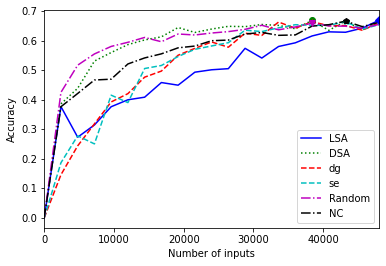

In [22]:
#adversarial jsma test set
#configuration 3
"""
6) Incremental guided retraining starting from the original model using only the new adversarial inputs.
Incremental training, starting with the previous trained model. Using at each iteration a subset of the new inputs.
"""
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.plot(n_inputs,accuracy_lsa_3,colors[0],linestyle=linestyles[0])
plt.plot(n_inputs,accuracy_dsa_3,colors[1],linestyle=linestyles[1])
plt.plot(n_inputs,accuracy_dg_3,colors[2],linestyle=linestyles[2])
plt.plot(n_inputs,accuracy_se_3,colors[3],linestyle=linestyles[3])
plt.plot(n_inputs,accuracy_random_3,colors[4],linestyle=linestyles[4])
plt.plot(n_inputs,accuracy_nc_3,colors[5],linestyle=linestyles[5])


legend_elements = [Line2D([0], [0], color=colors[0], label='LSA',ls = linestyles[0]),
                   Line2D([0], [0], color=colors[1], label='DSA',ls = linestyles[1]),
                   Line2D([0], [0], color=colors[2], label='dg',ls = linestyles[2]),
                   Line2D([0], [0], color=colors[3], label='se',ls = linestyles[3]),
                   Line2D([0], [0], color=colors[4], label='Random',ls = linestyles[4]),
                   Line2D([0], [0], color=colors[5], label='NC',ls = linestyles[5])]



plt.legend(handles=legend_elements)#
#plt.title("Accuracy")

print(n_inputs[np.argmax(accuracy_lsa_3)],accuracy_lsa_3.max())
print(n_inputs[np.argmax(accuracy_dsa_3)],accuracy_dsa_3.max())
print(n_inputs[np.argmax(accuracy_dg_3)],accuracy_dg_3.max())
print(n_inputs[np.argmax(accuracy_se_3)],accuracy_se_3.max())
print(n_inputs[np.argmax(accuracy_random_3)],accuracy_random_3.max())
print(n_inputs[np.argmax(accuracy_nc_3)],accuracy_nc_3.max())

plt.plot(n_inputs[np.argmax(accuracy_lsa_3)],accuracy_lsa_3.max(),'-bD',)
plt.plot(n_inputs[np.argmax(accuracy_dsa_3)],accuracy_dsa_3.max(),'-go')
plt.plot(n_inputs[np.argmax(accuracy_dg_3)],accuracy_dg_3.max(),'-r+')
plt.plot(n_inputs[np.argmax(accuracy_se_3)],accuracy_se_3.max(),'-c*')
plt.plot(n_inputs[np.argmax(accuracy_random_3)],accuracy_random_3.max(),'-mv')
plt.plot(n_inputs[np.argmax(accuracy_nc_3)],accuracy_nc_3.max(),'-kp')

plt.xlabel('Number of inputs')
plt.ylabel('Accuracy')
plt.xlim([0, len(x_train_and_adversary)])
#plt.ylim([0, 1])

plt.savefig(save_dir+"/"+dataset+"_"+config_lc+"_"+"accuracy" + ".svg")

plt.show()

47999 0.669110894203186
38400 0.6683609485626221
38400 0.664111316204071
43200 0.664277970790863
38400 0.659195065498352
43200 0.666027843952179


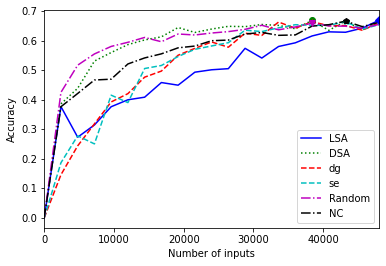

In [21]:
#adversarial jsma test set
#configuration 3
"""
6) Incremental guided retraining starting from the original model using only the new adversarial inputs.
Incremental training, starting with the previous trained model. Using at each iteration a subset of the new inputs.
"""
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.plot(n_inputs,accuracy_lsa_3,colors[0],linestyle=linestyles[0])
plt.plot(n_inputs,accuracy_dsa_3,colors[1],linestyle=linestyles[1])
plt.plot(n_inputs,accuracy_dg_3,colors[2],linestyle=linestyles[2])
plt.plot(n_inputs,accuracy_se_3,colors[3],linestyle=linestyles[3])
plt.plot(n_inputs,accuracy_random_3,colors[4],linestyle=linestyles[4])
plt.plot(n_inputs,accuracy_nc_3,colors[5],linestyle=linestyles[5])


legend_elements = [Line2D([0], [0], color=colors[0], label='LSA',ls = linestyles[0]),
                   Line2D([0], [0], color=colors[1], label='DSA',ls = linestyles[1]),
                   Line2D([0], [0], color=colors[2], label='dg',ls = linestyles[2]),
                   Line2D([0], [0], color=colors[3], label='se',ls = linestyles[3]),
                   Line2D([0], [0], color=colors[4], label='Random',ls = linestyles[4]),
                   Line2D([0], [0], color=colors[5], label='NC',ls = linestyles[5])]



plt.legend(handles=legend_elements)#
#plt.title("Accuracy")

print(n_inputs[np.argmax(accuracy_lsa_3)],accuracy_lsa_3.max())
print(n_inputs[np.argmax(accuracy_dsa_3)],accuracy_dsa_3.max())
print(n_inputs[np.argmax(accuracy_dg_3)],accuracy_dg_3.max())
print(n_inputs[np.argmax(accuracy_se_3)],accuracy_se_3.max())
print(n_inputs[np.argmax(accuracy_random_3)],accuracy_random_3.max())
print(n_inputs[np.argmax(accuracy_nc_3)],accuracy_nc_3.max())

plt.plot(n_inputs[np.argmax(accuracy_lsa_3)],accuracy_lsa_3.max(),'-bD',)
plt.plot(n_inputs[np.argmax(accuracy_dsa_3)],accuracy_dsa_3.max(),'-go')
plt.plot(n_inputs[np.argmax(accuracy_dg_3)],accuracy_dg_3.max(),'-r+')
plt.plot(n_inputs[np.argmax(accuracy_se_3)],accuracy_se_3.max(),'-c*')
plt.plot(n_inputs[np.argmax(accuracy_random_3)],accuracy_random_3.max(),'-mv')
plt.plot(n_inputs[np.argmax(accuracy_nc_3)],accuracy_nc_3.max(),'-kp')

plt.xlabel('Number of inputs')
plt.ylabel('Accuracy')
plt.xlim([0, len(x_train_and_adversary)])
#plt.ylim([0, 1])

plt.savefig(save_dir+"/"+dataset+"_"+config_lc+"_"+"accuracy" + ".svg")

plt.show()